# Modeling the Orbit of the Earth

Arwen Sadler

Based on starter code for the orbit example
Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Simulating Earth's Orbit Around the Sun

For this project, we took code that simulated the Earth falling into the sun (without an orbit) and modified it so that it modeled the orbit of the earth.

Here's what my final code ended up looking like:

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
yr = UNITS.year;

In [3]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 * m #The distance of the Earth from the sun at an arbritrary point in orbit

init = State(x = r_0,
             y = 0 * m,
             vx = 0 * m/s,
             vy = 30330 * m/s)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,30330.0 meter / second


In [4]:
# Making a system object

#r_earth = 6.371e6 * m
#r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg, #Mass of the sun
                #r_final=r_sun + r_earth,
                m2=5.972e24 * kg, #Mass of the earth
                t_0=0 * s,
                t_end= 1 * yr)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
m2,5.972e+24 kilogram
t_0,0 second
t_end,1 year


In [5]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distances x and y, velocities vx and vy
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    r = Vector(x, y)
    ForceMag = G * m1 * m2 / r.mag**2
    
    direction = r.hat()
    force = direction * ForceMag
    
    return force

In [6]:
#Calling the function to make sure it matches what we expect

universal_gravitation(init, system)

<Quantity([3.6686486e+22 0.0000000e+00], 'newton')>

In [7]:
#Checking that the returned value is a vector

type(universal_gravitation(init, system))

modsim.ModSimVector

In [8]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of x, y, vx, and vy
    """
    x, y, vx, vy = state
    unpack(system)    

    force = universal_gravitation(state, system)
    dxdt = vx
    dydt = vy
    dvxdt = -force.x / m2
    dvydt = -force.y / m2
    
    return dxdt, dydt, dvxdt, dvydt

In [9]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(30330.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [10]:
# Finally we can run the simulation
# Running the simulation with method = 'RK23' makes it more accurate than the default method

results, details = run_ode_solver(system, slope_func, method='RK23')
details

,values
sol,None
t_events,[]
nfev,137
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [11]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [12]:
# Scaling the distance to million km

x = results.x / 1e9;
y = results.y / 1e9;

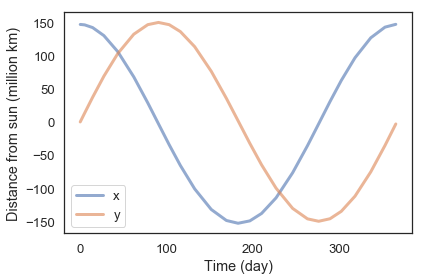

In [13]:
# And plotting

plot(x, label='x')
plot(y, label = 'y')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

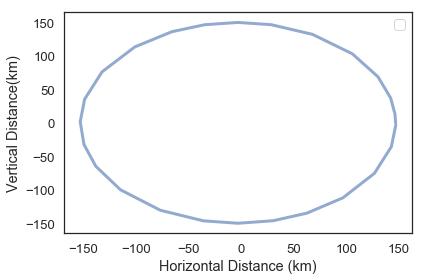

In [14]:
#An x-y plot, showing the Earth's position as it orbits around the sun
plot(x,y)

decorate(xlabel='Horizontal Distance (km)',
         ylabel='Vertical Distance(km)')